Chapter 21
# 线图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [27]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [2]:
undirected_G = nx.Graph()
# 创建无向图的实例

In [3]:
undirected_G.add_nodes_from(['a', 'b', 'c', 'd'])
# 添加多个顶点

In [4]:
undirected_G.add_edges_from([('a','b'),
                             ('b','c'),
                             ('b','d'), 
                             ('c','d'),
                             ('c','a')])
# 增加一组边

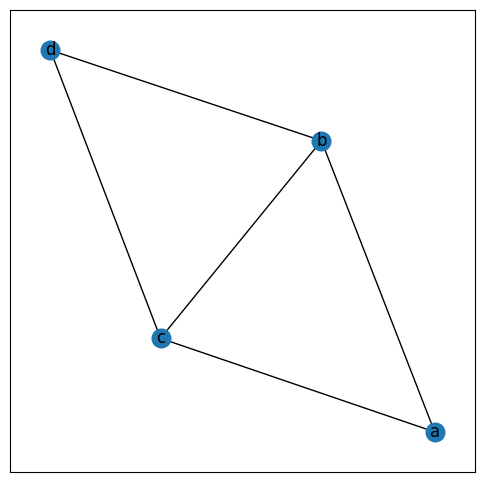

In [5]:
plt.figure(figsize = (6,6))
nx.draw_networkx(undirected_G, 
                 node_size = 180)

In [16]:
sequence_edges_G = list(undirected_G.edges())
# 获取无向图边的序列，用于关联矩阵列排序
sequence_edges_G

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

## 线图

In [6]:
# 转换成线图
L_G = nx.line_graph(undirected_G)

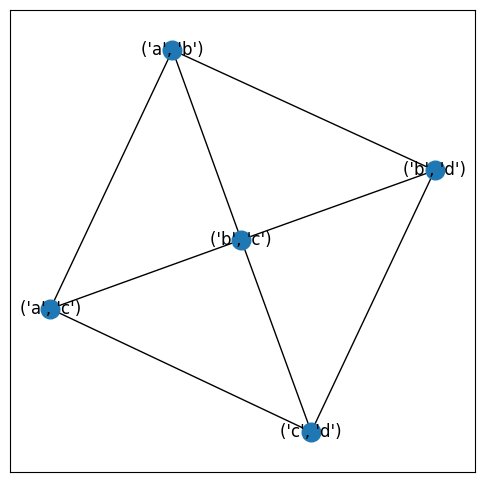

In [25]:
# 可视化线图
plt.figure(figsize = (6,6))
nx.draw_networkx(L_G, pos = nx.spring_layout(L_G),
                 node_size = 180)
plt.savefig('线图.svg')

## 矩阵关系

In [19]:
L_G.nodes()

NodeView((('b', 'c'), ('b', 'd'), ('a', 'b'), ('a', 'c'), ('c', 'd')))

In [17]:
nx.adjacency_matrix(L_G).todense()
# 需要调整列顺序，列置换

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0]], dtype=int32)

In [31]:
# 线图的链接矩阵，调整列顺序
A_LG = nx.adjacency_matrix(L_G, 
             nodelist = sequence_edges_G).todense()
A_LG

array([[0, 1, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [0, 1, 1, 1, 0]], dtype=int32)

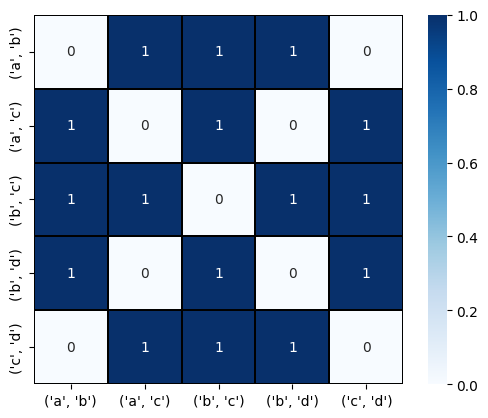

In [32]:
sns.heatmap(A_LG, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            yticklabels = list(sequence_edges_G), 
            xticklabels = list(sequence_edges_G),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('线图的邻接矩阵.svg')

In [20]:
# 图的关联矩阵
C = nx.incidence_matrix(undirected_G).todense()

In [21]:
C.T @ C - 2 * np.identity(5)

array([[0., 1., 1., 1., 0.],
       [1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0.]])